# Classification

A notebook reproducing some classification examples from Elements of Statistical Learning.

In [2]:
import numpy as np
import scipy.stats as sps
import scipy.linalg as spl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
from mlalgos.supervised_learning.linear_regression import LinearRegression
from mlalgos.supervised_learning.knn import kNN

# Generate some data

In [4]:
class DataGenerator():
    def __init__(self):
        # The distributions to generate fake data from following Chapter 2 of ESL
        self.means0 = sps.multivariate_normal(mean=[1,0], cov=np.eye(2)).rvs(10)
        self.means1 = sps.multivariate_normal(mean=[0,1], cov=np.eye(2)).rvs(10)
        self.gaussians0 = [sps.multivariate_normal(mean=m, cov=np.eye(2)/5) for m in self.means0]
        self.gaussians1 = [sps.multivariate_normal(mean=m, cov=np.eye(2)/5) for m in self.means1]

    def generate0(self, N):
        """
        Generates N data points for class 0.
        """
        X0 = []
        for i in range(N):
            idx = np.random.randint(10)
            X0.append(self.gaussians0[idx].rvs())
        return np.array(X0)

    def generate1(self, N):
        """
        Generates N data points for class 1.
        """
        X1 = []
        for i in range(N):
            idx = np.random.randint(10)
            X1.append(self.gaussians1[idx].rvs())
        return np.array(X1)
    
    def generate(self, N):
        """
        Generate data for both classes.

        Args:
            N   (int): Number of data points in each class

        Returns:
            (np.array, np.array): The features and the classes
        """
        X0 = self.generate0(N)
        X1 = self.generate1(N)
        X = np.append(X0, X1, axis=0)
        Y = np.append(np.zeros(N), np.ones(N))
        return X, Y

generator = DataGenerator()
X, Y = generator.generate(100)

# Define some plotting functions
(Move to package later if reused?)

In [5]:
# Some colours
GRAY1, GRAY4, PURPLE = '#231F20', '#646369', '#A020F0'
BLUE, ORANGE, BLUE1 = '#57B5E8', '#E69E00', '#174A7E'

In [6]:
def plot_train_data(title):
    fig, ax = plt.subplots(figsize=(2.8, 2.8), dpi=110)
    #ax.set_aspect(1.3)
    ax.scatter(X.T[0], X.T[1], s=18, facecolors='none',
               edgecolors=np.array([BLUE, ORANGE])[Y.astype(int)])
    ax.tick_params(
        bottom=False, left=False, labelleft=False, labelbottom=False)
    ax.set_xlim(-3, 4.)
    ax.set_ylim(-3., 4)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ax.text(-3, 4.2, title, color=GRAY4, fontsize=9)
    return fig, ax

In [7]:
def fill_prediction_grid(n1, n2, predict):
    x1, x2 = np.linspace(-3., 4., n1), np.linspace(-3., 4., n2)
    X = np.array([np.tile(x1, n2), np.repeat(x2, n1)])
    y = predict(X.T)
    return X, y>0.5

def fill_prediction_meshgrid(predict):
    n1, n2 = 1000, 1000
    X, y = fill_prediction_grid(n1, n2, predict)
    return X[0].reshape(n1, n2), X[1].reshape(n1, n2), y.reshape(n1, n2)

def plot_model(predict, title):
    fig, ax = plot_train_data(title)
    # plot background dots
    X, y = fill_prediction_grid(69, 99, predict)
    ax.scatter(X.T[:, 0], X.T[:, 1], marker='.', lw=0, s=2,
               c=np.array([BLUE, ORANGE])[y.astype(int)])
    # plot the decision boundary
    X0, X1, Y = fill_prediction_meshgrid(predict)
    ax.contour(X0, X1, Y, [0.5], colors=GRAY1, linewidths=[0.7])
    return fig, ax

# Linear Classifier

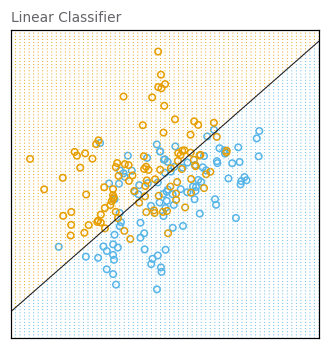

In [8]:
linear_classifier = LinearRegression()
linear_classifier.fit(X, Y)
linear_predict = linear_classifier.predict

fig_linear, _ = plot_model(linear_predict, 'Linear Classifier')

# $k$ Nearest Neighbours

In [12]:
knn = kNN(15)
knn.fit(X, Y)
knn_predict = knn.predict

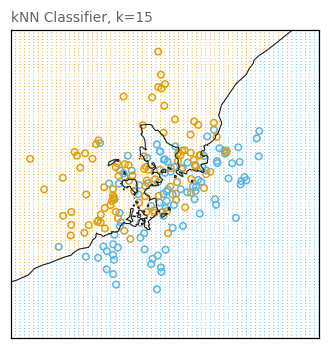

In [14]:
fig_knn15, _ = plot_model(knn_predict, 'kNN Classifier, k=15')

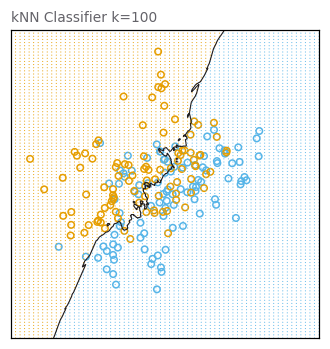

In [15]:
knn100 = kNN(k=100)
knn100.fit(X, Y)
_, _ = plot_model(knn100.predict, 'kNN Classifier k=100')